In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

# Daily data

In [136]:
df_day = pd.read_csv('./bike_data/day.csv')
num_features = ['temp', 'hum', 'windspeed']
cat_features = ['season', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

## Simple linear regression (R^2 = 0.5, MSE = 2.016E6)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_day[num_features], df_day.cnt, random_state = 1, test_size = 0.3)

In [39]:
X_train.shape, x_test.shape

((511, 3), (183, 7))

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
lr.score(X_test, y_test) # R^2 value

0.49899180966500434

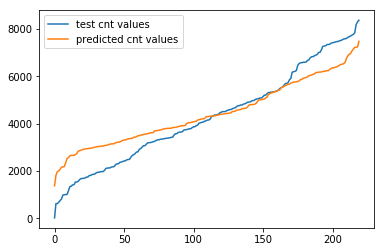

In [50]:
plt.plot(sorted(y_test), label = 'test cnt values')
plt.plot(sorted(y_pred), label = 'predicted cnt values')
plt.legend()

In [52]:
mean_squared_error(y_test, y_pred)

2015760.6241507528

## Ridge (MSE = 2.017e6)

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [103]:
parameters = {
    'alpha': 10**np.linspace(-4, -1, 40)
}
rg = Ridge(normalize=True)
gridcv = GridSearchCV(rg, parameters, cv = 5, scoring='neg_mean_squared_error')

gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.0001 , 0.00012, 0.00014, 0.00017, 0.0002 , 0.00024, 0.00029,
       0.00035, 0.00041, 0.00049, 0.00059, 0.0007 , 0.00084, 0.001  ,
       0.00119, 0.00143, 0.0017 , 0.00203, 0.00242, 0.00289, 0.00346,
       0.00412, 0.00492, 0.00588, 0.00702, 0.00838, 0.01   , 0.01194,
       0.01425, 0.01701, 0.02031, 0.02424, 0.02894, 0.03455, 0.04125,
       0.04924, 0.05878, 0.07017, 0.08377, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [96]:
- gridcv.best_score_ # best mse 

2066071.5784765717

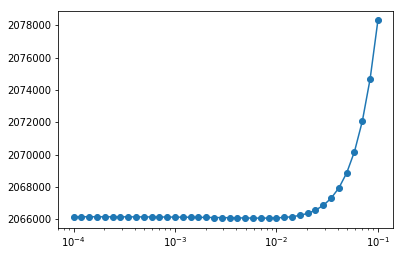

In [97]:
alpha = gridcv.param_grid['alpha']
mse = gridcv.cv_results_['mean_test_score']
plt.plot(alpha, -mse, 'o-')
plt.xscale('log')

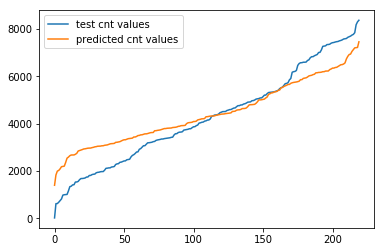

In [120]:
plt.plot(sorted(y_test), label = 'test cnt values')
plt.plot(sorted(y_pred), label = 'predicted cnt values')
plt.legend()

In [100]:
y_pred = gridcv.predict(X_test)
mean_squared_error(y_pred, y_test)

2017700.203074602

## Lasso

In [101]:
from sklearn.linear_model import Lasso

In [116]:
parameters = {
    'alpha': 10**np.linspace(-4, -1, 40)
}
lasso = Ridge(normalize=True)
gridcv = GridSearchCV(lasso, parameters, cv = 5, scoring='neg_mean_squared_error')

gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.0001 , 0.00012, 0.00014, 0.00017, 0.0002 , 0.00024, 0.00029,
       0.00035, 0.00041, 0.00049, 0.00059, 0.0007 , 0.00084, 0.001  ,
       0.00119, 0.00143, 0.0017 , 0.00203, 0.00242, 0.00289, 0.00346,
       0.00412, 0.00492, 0.00588, 0.00702, 0.00838, 0.01   , 0.01194,
       0.01425, 0.01701, 0.02031, 0.02424, 0.02894, 0.03455, 0.04125,
       0.04924, 0.05878, 0.07017, 0.08377, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

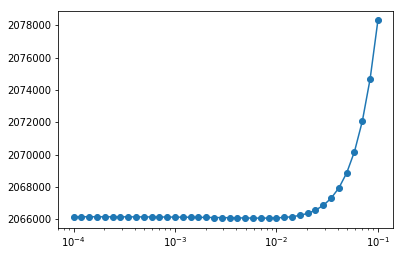

In [117]:
alpha = gridcv.param_grid['alpha']
mse = gridcv.cv_results_['mean_test_score']
plt.plot(alpha, -mse, 'o-')
plt.xscale('log')

In [118]:
y_pred = gridcv.predict(X_test)
mean_squared_error(y_pred, y_test)

2017700.203074602

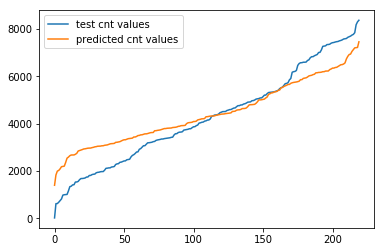

In [119]:
plt.plot(sorted(y_test), label = 'test cnt values')
plt.plot(sorted(y_pred), label = 'predicted cnt values')
plt.legend()

## Random forest (MSE = 1.473E6)

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
parameters = {
    'max_depth': np.arange(3, 6, 1),
    'min_samples_leaf': np.arange(3, 10, 1),
}
forest = RandomForestRegressor(random_state=42, n_estimators=100)
gridcv = GridSearchCV(forest, parameters, cv = 5, scoring='neg_mean_squared_error')

In [148]:
X_train, X_test, y_train, y_test = train_test_split(df_day[feature], df_day.cnt)

In [149]:
feature = num_features + cat_features
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5]), 'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [150]:
gridcv.best_estimator_.feature_importances_

array([0.62461071, 0.12919391, 0.05414976, 0.11735823, 0.0235047 ,
       0.00241817, 0.01810054, 0.00750514, 0.02315885])

In [151]:
feature_importance = pd.Series(gridcv.best_estimator_.feature_importances_, feature)

### Feature ranking 

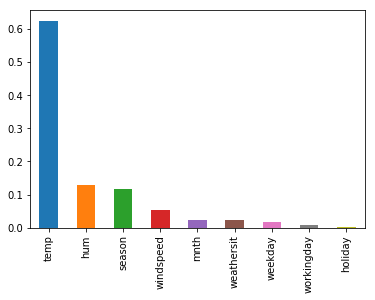

In [152]:
feature_importance.sort_values(ascending=False).plot(kind = 'bar')

In [154]:
y_pred = gridcv.best_estimator_.predict(X_test)

In [155]:
mean_squared_error(y_pred, y_test)

1474031.0763662416